In [243]:
import bs4 as bs
import requests
import yfinance as yf
import datetime
import pandas as pd
import numpy as np

resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = datetime.datetime(2018,1,2)
end = pd.to_datetime("today")
df= yf.download(tickers, start=start, end=end)
print(df)

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
             Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2018-01-02   65.877853  51.647556  104.754112   41.442081   82.745354   
2018-01-03   67.554039  51.014027  105.702019   41.434864   84.040207   
2018-01-04   67.047279  51.335667  109.602280   41.627323   83.560951   
2018-01-05   68.119247  51.316177  110.767433   42.101261   85.015579   
2018-01-08   68.265442  50.809345  109.987381   41.944889   83.653427   
...                ...        ...         ...         ...         ...   
2021-01-15  126.209999  15.760000  165.250000  127.139999  110.519997   
2021-01-19  127.349998  15.970000  165.929993  127.830002  112.

In [244]:
df = df['Adj Close']
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,65.877853,51.647556,104.754112,41.442081,82.745354,89.101776,192.490005,55.684303,146.372726,177.699997,...,64.657593,72.152405,65.490776,25.918779,65.562332,77.388687,121.132782,103.709999,46.599628,70.380058
2018-01-03,67.554039,51.014027,105.702019,41.434864,84.040207,89.433365,195.820007,55.807426,147.048264,181.039993,...,65.953041,73.569473,65.266426,25.883478,66.361748,77.322296,121.972481,105.769997,46.544483,70.703651
2018-01-04,67.047279,51.335667,109.602280,41.627323,83.560951,89.234398,199.250000,55.712711,148.789413,183.220001,...,67.143723,73.671303,65.256653,26.201174,66.804810,78.109459,121.796738,107.860001,46.737503,71.125328
2018-01-05,68.119247,51.316177,110.767433,42.101261,85.015579,90.314545,202.320007,55.873722,150.016815,185.339996,...,70.629974,73.611900,66.173569,26.395323,66.679596,78.564674,123.007484,109.540001,46.755882,71.939262
2018-01-08,68.265442,50.809345,109.987381,41.944889,83.653427,91.811577,207.800003,55.712711,151.215637,185.039993,...,71.096703,73.942833,66.622284,26.704195,66.920395,78.697456,123.241814,110.629997,46.526104,72.802223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,126.209999,15.760000,165.250000,127.139999,110.519997,106.800003,329.690002,111.300003,253.649994,458.079987,...,136.600006,47.889999,58.439999,22.490000,103.500000,106.620003,160.119995,409.220001,49.139999,161.309998
2021-01-19,127.349998,15.970000,165.929993,127.830002,112.180000,103.500000,336.299988,112.570000,255.839996,456.500000,...,139.360001,48.840000,58.320000,21.090000,104.260002,107.389999,159.929993,405.839996,49.330002,162.570007
2021-01-20,128.110001,16.170000,165.179993,132.029999,112.620003,103.790001,347.869995,112.889999,261.670013,469.730011,...,138.000000,49.529999,58.680000,21.049999,104.000000,109.410004,163.460007,406.549988,48.299999,163.360001


In [245]:
# drop tickers that didn't contain full data in the time range
df=df.drop([col for col in df.columns if np.isnan(df[col][0])==1], axis=1)
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,65.877853,51.647556,104.754112,41.442081,82.745354,89.101776,192.490005,55.684303,146.372726,177.699997,...,64.657593,72.152405,65.490776,25.918779,65.562332,77.388687,121.132782,103.709999,46.599628,70.380058
2018-01-03,67.554039,51.014027,105.702019,41.434864,84.040207,89.433365,195.820007,55.807426,147.048264,181.039993,...,65.953041,73.569473,65.266426,25.883478,66.361748,77.322296,121.972481,105.769997,46.544483,70.703651
2018-01-04,67.047279,51.335667,109.602280,41.627323,83.560951,89.234398,199.250000,55.712711,148.789413,183.220001,...,67.143723,73.671303,65.256653,26.201174,66.804810,78.109459,121.796738,107.860001,46.737503,71.125328
2018-01-05,68.119247,51.316177,110.767433,42.101261,85.015579,90.314545,202.320007,55.873722,150.016815,185.339996,...,70.629974,73.611900,66.173569,26.395323,66.679596,78.564674,123.007484,109.540001,46.755882,71.939262
2018-01-08,68.265442,50.809345,109.987381,41.944889,83.653427,91.811577,207.800003,55.712711,151.215637,185.039993,...,71.096703,73.942833,66.622284,26.704195,66.920395,78.697456,123.241814,110.629997,46.526104,72.802223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,126.209999,15.760000,165.250000,127.139999,110.519997,106.800003,329.690002,111.300003,253.649994,458.079987,...,136.600006,47.889999,58.439999,22.490000,103.500000,106.620003,160.119995,409.220001,49.139999,161.309998
2021-01-19,127.349998,15.970000,165.929993,127.830002,112.180000,103.500000,336.299988,112.570000,255.839996,456.500000,...,139.360001,48.840000,58.320000,21.090000,104.260002,107.389999,159.929993,405.839996,49.330002,162.570007
2021-01-20,128.110001,16.170000,165.179993,132.029999,112.620003,103.790001,347.869995,112.889999,261.670013,469.730011,...,138.000000,49.529999,58.680000,21.049999,104.000000,109.410004,163.460007,406.549988,48.299999,163.360001


In [223]:
# calculate monthly returns 
stock_monthly_returns = df.resample('M').ffill().pct_change()
stock_monthly_returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,-0.065913,0.000632,-0.023421,0.068185,0.032169,-0.041517,0.141191,-0.029440,0.001929,0.046906,...,-0.019114,-0.123545,-0.078112,-0.111632,0.035094,-0.033491,-0.085510,0.121630,0.021329,0.053825
2018-03-31,-0.024639,-0.042212,0.038177,-0.058051,-0.182854,-0.094052,0.085055,-0.006796,-0.046643,0.033233,...,0.013895,-0.014919,-0.100987,-0.042538,0.031376,0.046080,-0.059942,0.007601,-0.040750,0.032773
2018-04-30,-0.015146,-0.173787,-0.034585,-0.015020,0.030640,0.050690,0.034228,-0.025203,-0.006292,0.025546,...,-0.110742,0.042085,0.000596,0.092773,-0.052262,0.023141,0.056218,-0.031324,0.038308,0.001108
2018-05-31,-0.058108,0.016581,0.123810,0.135124,0.024754,-0.089202,0.266456,0.058489,0.030027,0.124910,...,0.065787,0.055478,-0.129718,-0.135771,-0.031472,-0.062207,-0.031779,0.138545,0.005268,0.002635
2018-06-30,-0.001292,-0.128158,0.055501,-0.009418,-0.063574,0.038105,0.073228,-0.008776,0.050405,-0.021943,...,-0.041844,0.018341,0.001091,-0.107898,-0.042898,-0.038239,0.001556,-0.066836,-0.038679,0.017802
2018-07-31,0.070497,0.041623,0.040752,0.027983,0.005633,-0.040342,-0.133284,0.079433,-0.026041,0.003568,...,0.104352,-0.014747,0.099155,0.082083,0.136242,0.013679,0.126346,-0.037138,-0.018789,0.016633
2018-08-31,0.022713,0.026445,0.161439,0.200422,0.040659,0.104308,0.146814,0.019835,0.061131,0.076958,...,0.085265,-0.006295,-0.170235,0.072776,-0.005758,0.100556,-0.015057,0.245124,0.036559,0.047641
2018-09-30,0.044418,0.020998,0.026578,-0.008303,-0.014586,0.025008,0.106178,0.097546,0.006684,0.024439,...,0.030066,0.060496,-0.052417,-0.022570,0.052167,0.046265,0.065382,0.029638,-0.058923,0.010596


In [224]:
stock_monthly_returns.mean()

A       0.018307
AAL    -0.022742
AAP     0.014998
AAPL    0.039635
ABBV    0.008254
          ...   
YUM     0.011195
ZBH     0.011153
ZBRA    0.040269
ZION    0.005123
ZTS     0.023092
Length: 494, dtype: float64

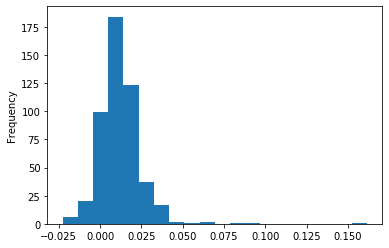

In [225]:
stock_monthly_returns.mean().plot.hist(bins=20)

In [226]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
normalized_stock_monthly_returns = min_max_scaler.fit_transform(pd.DataFrame(stock_monthly_returns.mean()))

In [227]:
normalized_stock_monthly_returns

array([[0.22286883],
       [0.        ],
       [0.20490306],
       [0.33867255],
       [0.16828845],
       [0.15353726],
       [0.2359292 ],
       [0.2294963 ],
       [0.21284372],
       [0.26702993],
       [0.23359947],
       [0.18001664],
       [0.18461188],
       [0.29510404],
       [0.17896694],
       [0.17308142],
       [0.28658766],
       [0.15773457],
       [0.10632735],
       [0.20260586],
       [0.22512081],
       [0.20674157],
       [0.24533259],
       [0.30281276],
       [0.14914099],
       [0.15951224],
       [0.18585085],
       [0.20254599],
       [0.27081217],
       [0.15967084],
       [0.49302899],
       [0.20894811],
       [0.19662572],
       [0.2000691 ],
       [0.20164234],
       [0.26776458],
       [0.18244513],
       [0.26892738],
       [0.18252983],
       [0.19644104],
       [0.12641365],
       [0.35587641],
       [0.22292165],
       [0.19853446],
       [0.24041201],
       [0.18447303],
       [0.14856435],
       [0.185

In [228]:
# the higher the rank, the more returns
stock_monthly_returns.mean().rank(ascending=False)

A       118.0
AAL     494.0
AAP     165.0
AAPL     11.0
ABBV    305.0
        ...  
YUM     245.0
ZBH     247.0
ZBRA      9.0
ZION    369.0
ZTS      67.0
Length: 494, dtype: float64

In [229]:
stock_monthly_returns.std()

A       0.070559
AAL     0.141211
AAP     0.102986
AAPL    0.097817
ABBV    0.090944
          ...   
YUM     0.079846
ZBH     0.088105
ZBRA    0.117756
ZION    0.107631
ZTS     0.053457
Length: 494, dtype: float64

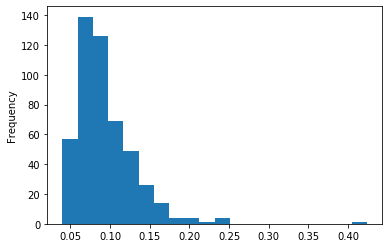

In [230]:
stock_monthly_returns.std().plot.hist(bins=20)

In [231]:
normalized_stock_monthly_returns_std = min_max_scaler.fit_transform(pd.DataFrame(-1*stock_monthly_returns.std()))
normalized_stock_monthly_returns_std

array([[0.9203068 ],
       [0.73616117],
       [0.83578961],
       [0.84926183],
       [0.86717573],
       [0.94383745],
       [0.73739534],
       [0.96096212],
       [0.93015674],
       [0.92585894],
       [0.87148914],
       [0.94257506],
       [0.94204739],
       [0.84105427],
       [0.99101396],
       [0.96549527],
       [0.88809383],
       [0.90052661],
       [0.80985043],
       [0.94334286],
       [0.94519181],
       [0.95081803],
       [0.75241619],
       [0.68748709],
       [0.77571587],
       [0.94384372],
       [0.90670054],
       [0.80175266],
       [0.79264493],
       [0.92924063],
       [0.66720871],
       [0.89534974],
       [0.91934661],
       [0.82992564],
       [0.97662409],
       [0.87941967],
       [0.77595782],
       [0.89541058],
       [0.88856855],
       [0.93297348],
       [0.89659672],
       [0.        ],
       [0.94563571],
       [0.89670706],
       [0.72952186],
       [0.95699265],
       [1.        ],
       [0.873

In [232]:
indexes = pd.DataFrame(normalized_stock_monthly_returns+normalized_stock_monthly_returns_std,columns = ['measure']).nlargest(10,'measure').index
indexes

Int64Index([153, 318, 310, 327, 309, 51, 365, 97, 493, 106], dtype='int64')

In [233]:
stock_monthly_returns.mean()[indexes].index

Index(['ENPH', 'NEE', 'MSFT', 'NOW', 'MSCI', 'AWK', 'POOL', 'CMG', 'ZTS',
       'COST'],
      dtype='object')

In [234]:
# the higher the rank, the less volatile
stock_monthly_returns.std().rank(ascending=True)

A       129.0
AAL     446.0
AAP     347.0
AAPL    324.0
ABBV    290.0
        ...  
YUM     206.0
ZBH     269.0
ZBRA    396.0
ZION    362.0
ZTS      33.0
Length: 494, dtype: float64

In [246]:
tickers = (stock_monthly_returns.mean().rank(ascending=False)+stock_monthly_returns.std().rank(ascending=True)).nsmallest(10).reset_index()['index']
tickers = tickers.tolist()

In [247]:
# adding walmart here because I feel like walmart stock would go up
tickers.append('WMT')

In [248]:
df=df[tickers]
df

,NEE,MSFT,AWK,ZTS,COST,DHR,DG,TMO,BLL,STE,WMT
Date,,,,,,,,,,,
2018-01-02,35.516525,82.383636,84.360161,70.380058,178.326767,91.036125,91.219170,191.439392,37.653549,85.578125,92.842651
2018-01-03,34.763092,82.767044,83.763557,70.703651,180.466812,92.247452,91.151291,194.951141,37.556076,84.444313,93.652519
2018-01-04,34.584469,83.495522,82.968071,71.125328,179.065369,92.690620,92.218079,197.391449,37.380619,83.911331,93.737274
2018-01-05,34.742477,84.530701,82.153633,71.939262,177.786987,93.271645,92.829041,200.774277,37.614563,84.260193,94.292885
2018-01-08,35.028736,84.616966,82.863884,72.802223,178.478241,93.803459,91.555161,201.101624,37.643799,86.062630,95.686600
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,82.040001,212.649994,159.720001,161.309998,362.160004,236.750000,211.440002,503.140015,90.419998,184.380005,144.639999
2021-01-19,82.809998,216.440002,159.270004,162.570007,354.470001,236.110001,206.059998,507.380005,90.419998,188.710007,143.389999
2021-01-20,84.050003,224.339996,163.399994,163.360001,361.299988,237.050003,205.119995,515.840027,92.260002,189.529999,145.509995


In [249]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,NEE,MSFT,AWK,ZTS,COST,DHR,DG,TMO,BLL,STE,WMT
NEE,0.000296,0.000166,0.000243,0.000165,0.000106,0.000141,0.000107,0.000128,0.000179,0.000163,0.000113
MSFT,0.000166,0.000411,0.000161,0.000248,0.000187,0.000221,0.000156,0.000235,0.000185,0.000208,0.000149
AWK,0.000243,0.000161,0.000315,0.000160,0.000120,0.000143,0.000117,0.000136,0.000189,0.000161,0.000121
ZTS,0.000165,0.000248,0.000160,0.000329,0.000141,0.000195,0.000123,0.000209,0.000194,0.000204,0.000103
COST,0.000106,0.000187,0.000120,0.000141,0.000210,0.000126,0.000131,0.000135,0.000131,0.000117,0.000140
DHR,0.000141,0.000221,0.000143,0.000195,0.000126,0.000261,0.000114,0.000222,0.000153,0.000172,0.000101
DG,0.000107,0.000156,0.000117,0.000123,0.000131,0.000114,0.000277,0.000120,0.000123,0.000114,0.000136
TMO,0.000128,0.000235,0.000136,0.000209,0.000135,0.000222,0.000120,0.000318,0.000174,0.000178,0.000110
BLL,0.000179,0.000185,0.000189,0.000194,0.000131,0.000153,0.000123,0.000174,0.000333,0.000173,0.000115
STE,0.000163,0.000208,0.000161,0.000204,0.000117,0.000172,0.000114,0.000178,0.000173,0.000301,0.000097


In [250]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,NEE,MSFT,AWK,ZTS,COST,DHR,DG,TMO,BLL,STE,WMT
NEE,1.000000,0.476698,0.794841,0.529806,0.424732,0.506386,0.372087,0.417201,0.569580,0.546159,0.433954
MSFT,0.476698,1.000000,0.447016,0.674821,0.636534,0.675069,0.461493,0.649249,0.498586,0.591988,0.485603
AWK,0.794841,0.447016,1.000000,0.497703,0.465232,0.497463,0.394597,0.430647,0.583185,0.522512,0.448883
ZTS,0.529806,0.674821,0.497703,1.000000,0.537876,0.663962,0.407865,0.646324,0.585917,0.648151,0.373886
COST,0.424732,0.636534,0.465232,0.537876,1.000000,0.535868,0.544103,0.522920,0.494619,0.466716,0.637242
DHR,0.506386,0.675069,0.497463,0.663962,0.535868,1.000000,0.425375,0.771214,0.518431,0.613357,0.413905
DG,0.372087,0.461493,0.394597,0.407865,0.544103,0.425375,1.000000,0.405797,0.405580,0.395739,0.538777
TMO,0.417201,0.649249,0.430647,0.646324,0.522920,0.771214,0.405797,1.000000,0.535450,0.574740,0.405546
BLL,0.569580,0.498586,0.583185,0.585917,0.494619,0.518431,0.405580,0.535450,1.000000,0.548005,0.416544
STE,0.546159,0.591988,0.522512,0.648151,0.466716,0.613357,0.395739,0.574740,0.548005,1.000000,0.369153


In [251]:
# initialize weights
w = {}
for ticker in df.columns:
    w[ticker] = 1/len(df)

In [252]:
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

3.3979626638469696e-08

In [253]:
month_returns = df.resample('M').ffill().pct_change().mean()
month_returns

NEE     0.024758
MSFT    0.026955
AWK     0.021122
ZTS     0.023092
COST    0.020065
DHR     0.026246
DG      0.021735
TMO     0.025403
BLL     0.026998
STE     0.023163
WMT     0.011899
dtype: float64

In [254]:
quarter_returns = df.resample('Q').ffill().pct_change().mean()
quarter_returns

NEE     0.070607
MSFT    0.086321
AWK     0.063183
ZTS     0.063387
COST    0.064475
DHR     0.084087
DG      0.074111
TMO     0.086531
BLL     0.080413
STE     0.066607
WMT     0.048908
dtype: float64

In [255]:
half_year_returns = df.resample('6M').ffill().pct_change().mean()
half_year_returns

NEE     0.153873
MSFT    0.168457
AWK     0.127746
ZTS     0.142060
COST    0.122665
DHR     0.159705
DG      0.131515
TMO     0.154373
BLL     0.169806
STE     0.141755
WMT     0.070751
dtype: float64

In [256]:
year_returns = df.resample('Y').ffill().pct_change().mean()
year_returns

NEE     0.280289
MSFT    0.338931
AWK     0.231720
ZTS     0.267714
COST    0.248413
DHR     0.340160
DG      0.266073
TMO     0.332503
BLL     0.281349
STE     0.230584
WMT     0.183326
dtype: float64

In [257]:
returns = pd.concat([month_returns,quarter_returns, half_year_returns,year_returns], axis=1) # Creating a table for visualising returns and volatility of assets
returns.columns = ['month_returns','quarter_returns', 'half_year_returns', 'year_returns']

In [258]:
returns = returns.sort_values(by=['year_returns','half_year_returns','quarter_returns','month_returns'],ascending=False)
print(returns.to_string())

      month_returns  quarter_returns  half_year_returns  year_returns
DHR        0.026246         0.084087           0.159705      0.340160
MSFT       0.026955         0.086321           0.168457      0.338931
TMO        0.025403         0.086531           0.154373      0.332503
BLL        0.026998         0.080413           0.169806      0.281349
NEE        0.024758         0.070607           0.153873      0.280289
ZTS        0.023092         0.063387           0.142060      0.267714
DG         0.021735         0.074111           0.131515      0.266073
COST       0.020065         0.064475           0.122665      0.248413
AWK        0.021122         0.063183           0.127746      0.231720
STE        0.023163         0.066607           0.141755      0.230584
WMT        0.011899         0.048908           0.070751      0.183326


In [259]:
# calculate (max-min)/mean as a way to measure volatility
(df.resample('Y').max()-df.resample('Y').min())/df.resample('Y').mean()


,NEE,MSFT,AWK,ZTS,COST,DHR,DG,TMO,BLL,STE,WMT
Date,,,,,,,,,,,
2018-12-31,0.254611,0.314769,0.269449,0.280508,0.321816,0.176632,0.320059,0.268272,0.373165,0.359088,0.279697
2019-12-31,0.376323,0.486180,0.373289,0.474025,0.408788,0.423255,0.433538,0.418141,0.571004,0.397348,0.281831
2020-12-31,0.508915,0.503320,0.510015,0.568137,0.363264,0.671760,0.470949,0.710778,0.602255,0.548893,0.388037
2021-12-31,0.123938,0.062846,0.083838,0.051195,0.070160,0.088251,0.062570,0.087896,0.027553,0.095764,0.038152


In [260]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

NEE     0.280289
MSFT    0.338931
AWK     0.231720
ZTS     0.267714
COST    0.248413
DHR     0.340160
DG      0.266073
TMO     0.332503
BLL     0.281349
STE     0.230584
WMT     0.183326
dtype: float64

In [263]:
# Portfolio returns
w = [1/len(tickers) for ticker in tickers]
port_er = (w*ind_er).sum()
port_er

0.2728236695853533

In [264]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

NEE     0.272129
MSFT    0.320505
AWK     0.280686
ZTS     0.286665
COST    0.229053
DHR     0.255666
DG      0.263151
TMO     0.282071
BLL     0.288657
STE     0.274128
WMT     0.239537
dtype: float64

In [265]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['One_Year_Returns', 'Volatility']
assets

,One_Year_Returns,Volatility
NEE,0.280289,0.272129
MSFT,0.338931,0.320505
AWK,0.231720,0.280686
ZTS,0.267714,0.286665
COST,0.248413,0.229053
DHR,0.340160,0.255666
DG,0.266073,0.263151
TMO,0.332503,0.282071
BLL,0.281349,0.288657
STE,0.230584,0.274128


In [266]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [267]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [268]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol +' weight'] = [w[counter] for w in p_weights]

In [269]:
portfolios = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,NEE weight,MSFT weight,AWK weight,ZTS weight,COST weight,DHR weight,DG weight,TMO weight,BLL weight,STE weight,WMT weight
0,0.283580,0.207150,0.176357,0.069657,0.034537,0.019838,0.002874,0.142892,0.194508,0.056302,0.174366,0.101283,0.027385
1,0.282332,0.212042,0.107460,0.107422,0.141937,0.094009,0.073686,0.134923,0.058414,0.124254,0.025463,0.111023,0.021409
2,0.273883,0.205461,0.110780,0.123787,0.091721,0.107333,0.079848,0.080843,0.075756,0.110261,0.048025,0.037178,0.134469
3,0.278907,0.212062,0.176513,0.128800,0.115659,0.098392,0.066628,0.014240,0.101680,0.116520,0.085064,0.080820,0.015685
4,0.281468,0.205526,0.000311,0.001838,0.021562,0.040469,0.021824,0.282683,0.182703,0.097998,0.094172,0.182929,0.073512


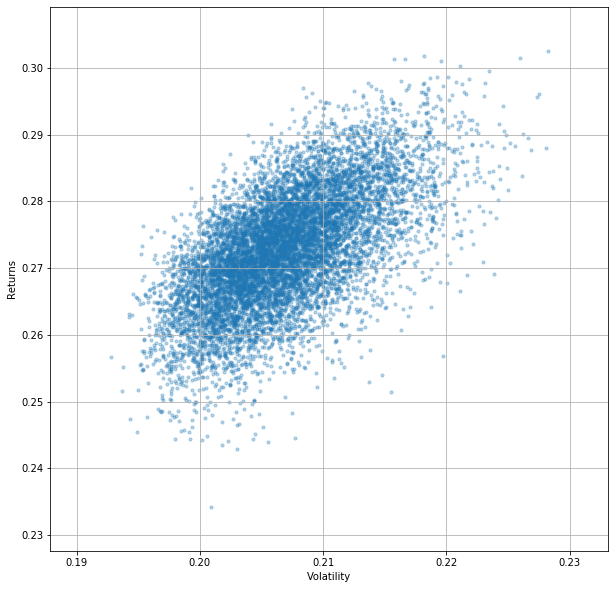

In [270]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [272]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns        0.256649
Volatility     0.192765
NEE weight     0.066489
MSFT weight    0.001170
AWK weight     0.092256
ZTS weight     0.012452
COST weight    0.121477
DHR weight     0.168006
DG weight      0.171278
TMO weight     0.034555
BLL weight     0.016377
STE weight     0.126751
WMT weight     0.189189
Name: 1421, dtype: float64

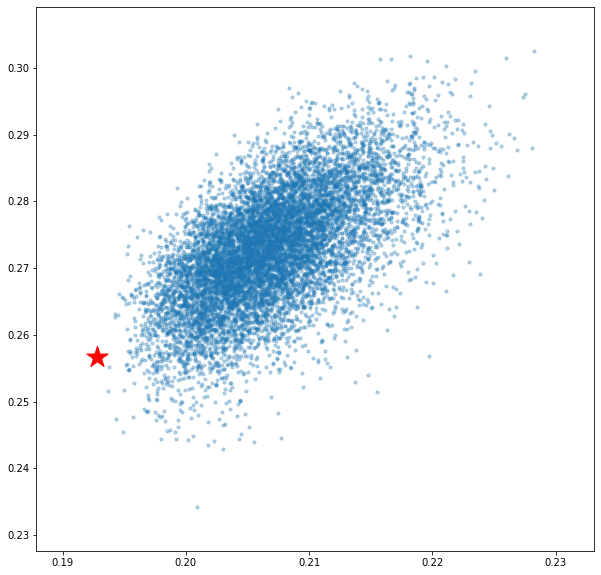

In [273]:
# plotting the minimum volatility portfolio
import matplotlib.pyplot as plt
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [274]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.296985
Volatility     0.208334
NEE weight     0.115775
MSFT weight    0.133970
AWK weight     0.011331
ZTS weight     0.009573
COST weight    0.114987
DHR weight     0.147083
DG weight      0.205080
TMO weight     0.175272
BLL weight     0.055291
STE weight     0.024183
WMT weight     0.007454
Name: 3902, dtype: float64

In [275]:
# sharpe ratio
((portfolios['Returns']-rf)/portfolios['Volatility'])[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]

1.3775222212339722

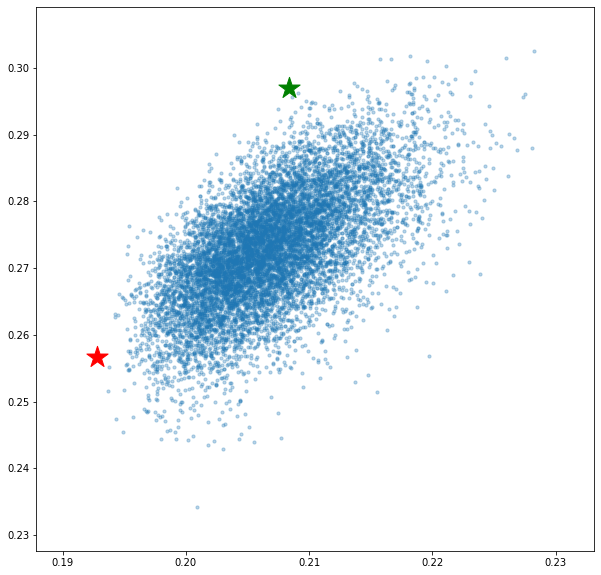

In [276]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

In [277]:
portfolios=portfolios.sort_values(by=['Returns','Volatility'],ascending=[False, True])

In [278]:
portfolios.loc[portfolios['Volatility']<0.28]

,Returns,Volatility,NEE weight,MSFT weight,AWK weight,ZTS weight,COST weight,DHR weight,DG weight,TMO weight,BLL weight,STE weight,WMT weight
6006,0.302498,0.228253,0.054806,0.196504,0.008666,0.066200,0.002525,0.208250,0.023307,0.154076,0.123332,0.157585,0.004749
7902,0.301752,0.218203,0.118796,0.129035,0.056928,0.022204,0.059976,0.145506,0.047996,0.242839,0.138565,0.035879,0.002276
6758,0.301481,0.225930,0.066417,0.212683,0.038547,0.006529,0.020051,0.097110,0.006205,0.240557,0.220564,0.034900,0.056438
1504,0.301381,0.216656,0.072261,0.087114,0.004386,0.118105,0.028313,0.233452,0.122967,0.215213,0.042423,0.051207,0.024558
466,0.301304,0.215718,0.005689,0.177715,0.031480,0.015465,0.118636,0.235874,0.107901,0.168507,0.071442,0.024568,0.042723
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6717,0.244040,0.202273,0.129083,0.042243,0.201359,0.031359,0.136180,0.041115,0.009802,0.012684,0.028918,0.177405,0.189852
9327,0.243914,0.205546,0.126509,0.008491,0.178265,0.056716,0.045765,0.016123,0.043003,0.001117,0.166037,0.170959,0.187014
5225,0.243461,0.201785,0.047896,0.059588,0.160550,0.114703,0.086758,0.006665,0.072637,0.007525,0.066178,0.178955,0.198544
2347,0.242867,0.203038,0.102707,0.002877,0.260162,0.174953,0.042067,0.033491,0.128511,0.005066,0.017945,0.013579,0.218642


In [279]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [280]:
mu = expected_returns.mean_historical_return(df,compounding =False)
mu

NEE     0.319960
MSFT    0.382073
AWK     0.251080
ZTS     0.316975
COST    0.258544
DHR     0.347692
DG      0.301988
TMO     0.363851
BLL     0.330021
STE     0.296795
WMT     0.177912
dtype: float64

In [283]:
S = risk_models.sample_cov(df)
S

,NEE,MSFT,AWK,ZTS,COST,DHR,DG,TMO,BLL,STE,WMT
NEE,0.074618,0.041691,0.061367,0.041552,0.026798,0.035378,0.026741,0.032782,0.045451,0.041035,0.028489
MSFT,0.041691,0.103314,0.040910,0.061824,0.047192,0.055547,0.039186,0.059370,0.046205,0.051891,0.037824
AWK,0.061367,0.040910,0.079505,0.040370,0.030636,0.036114,0.029867,0.034656,0.047698,0.040711,0.031008
ZTS,0.041552,0.061824,0.040370,0.082528,0.035449,0.048646,0.030750,0.052638,0.048896,0.050904,0.025755
COST,0.026798,0.047192,0.030636,0.035449,0.053117,0.031681,0.033239,0.034066,0.032960,0.029437,0.035667
DHR,0.035378,0.055547,0.036114,0.048646,0.031681,0.066010,0.028667,0.056055,0.038422,0.042939,0.025571
DG,0.026741,0.039186,0.029867,0.030750,0.033239,0.028667,0.070159,0.030484,0.031134,0.028677,0.034403
TMO,0.032782,0.059370,0.034656,0.052638,0.034066,0.056055,0.030484,0.080039,0.044013,0.044807,0.027826
BLL,0.045451,0.046205,0.047698,0.048896,0.032960,0.038422,0.031134,0.044013,0.084332,0.043651,0.029035
STE,0.041035,0.051891,0.040711,0.050904,0.029437,0.042939,0.028677,0.044807,0.043651,0.075452,0.024399


In [284]:
ef = EfficientFrontier(mu,S)
ef

In [285]:
weights = ef.max_sharpe()
weights

OrderedDict([('NEE', 0.2013319948397091),
             ('MSFT', 0.0348833134170476),
             ('AWK', 0.0),
             ('ZTS', 0.0),
             ('COST', 0.0424936817940971),
             ('DHR', 0.2380513393487878),
             ('DG', 0.2333596552489936),
             ('TMO', 0.1670863266383216),
             ('BLL', 0.0827936887130432),
             ('STE', 0.0),
             ('WMT', 0.0)])

In [286]:
cleaned_weights = ef.clean_weights()
cleaned_weights

OrderedDict([('NEE', 0.20133),
             ('MSFT', 0.03488),
             ('AWK', 0.0),
             ('ZTS', 0.0),
             ('COST', 0.04249),
             ('DHR', 0.23805),
             ('DG', 0.23336),
             ('TMO', 0.16709),
             ('BLL', 0.08279),
             ('STE', 0.0),
             ('WMT', 0.0)])

In [287]:
ef.portfolio_performance(verbose =True)

Expected annual return: 33.0%
Annual volatility: 20.7%
Sharpe Ratio: 1.50


(0.3300912913605203, 0.20717342152663568, 1.496771589113581)

In [288]:
from pypfopt.discrete_allocation import DiscreteAllocation,get_latest_prices

In [289]:
portfolio_val = 10000
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value =portfolio_val)
allocation,leftover = da.lp_portfolio()
print("Discrete Allocaiton: ", allocation)
print("Funds Remaining: ", leftover)

Discrete Allocaiton:  {'NEE': 24, 'MSFT': 2, 'COST': 1, 'DHR': 10, 'DG': 11, 'TMO': 3, 'BLL': 10}
Funds Remaining:  64.85012817382812


# Method 2 - Optimization from 500 tickers

In [297]:
import bs4 as bs
import requests
import yfinance as yf
import datetime

resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = datetime.datetime(2018,1,2)
end = pd.to_datetime("today")
df= yf.download(tickers, start=start, end=end)
print(df)

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
             Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2018-01-02   65.877853  51.647556  104.754112   41.442081   82.745354   
2018-01-03   67.554039  51.014027  105.702019   41.434864   84.040207   
2018-01-04   67.047279  51.335667  109.602280   41.627323   83.560951   
2018-01-05   68.119247  51.316177  110.767433   42.101261   85.015579   
2018-01-08   68.265442  50.809345  109.987381   41.944889   83.653427   
...                ...        ...         ...         ...         ...   
2021-01-15  126.209999  15.760000  165.250000  127.139999  110.519997   
2021-01-19  127.349998  15.970000  165.929993  127.830002  112.

In [298]:
df = df['Adj Close']
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,65.877853,51.647556,104.754112,41.442081,82.745354,89.101776,192.490005,55.684303,146.372726,177.699997,...,64.657593,72.152405,65.490776,25.918779,65.562332,77.388687,121.132782,103.709999,46.599628,70.380058
2018-01-03,67.554039,51.014027,105.702019,41.434864,84.040207,89.433365,195.820007,55.807426,147.048264,181.039993,...,65.953041,73.569473,65.266426,25.883478,66.361748,77.322296,121.972481,105.769997,46.544483,70.703651
2018-01-04,67.047279,51.335667,109.602280,41.627323,83.560951,89.234398,199.250000,55.712711,148.789413,183.220001,...,67.143723,73.671303,65.256653,26.201174,66.804810,78.109459,121.796738,107.860001,46.737503,71.125328
2018-01-05,68.119247,51.316177,110.767433,42.101261,85.015579,90.314545,202.320007,55.873722,150.016815,185.339996,...,70.629974,73.611900,66.173569,26.395323,66.679596,78.564674,123.007484,109.540001,46.755882,71.939262
2018-01-08,68.265442,50.809345,109.987381,41.944889,83.653427,91.811577,207.800003,55.712711,151.215637,185.039993,...,71.096703,73.942833,66.622284,26.704195,66.920395,78.697456,123.241814,110.629997,46.526104,72.802223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,126.209999,15.760000,165.250000,127.139999,110.519997,106.800003,329.690002,111.300003,253.649994,458.079987,...,136.600006,47.889999,58.439999,22.490000,103.500000,106.620003,160.119995,409.220001,49.139999,161.309998
2021-01-19,127.349998,15.970000,165.929993,127.830002,112.180000,103.500000,336.299988,112.570000,255.839996,456.500000,...,139.360001,48.840000,58.320000,21.090000,104.260002,107.389999,159.929993,405.839996,49.330002,162.570007
2021-01-20,128.110001,16.170000,165.179993,132.029999,112.620003,103.790001,347.869995,112.889999,261.670013,469.730011,...,138.000000,49.529999,58.680000,21.049999,104.000000,109.410004,163.460007,406.549988,48.299999,163.360001


In [299]:
# drop tickers that didn't contain full data in the time range
df=df.drop([col for col in df.columns if np.isnan(df[col][0])==1], axis=1)
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,65.877853,51.647556,104.754112,41.442081,82.745354,89.101776,192.490005,55.684303,146.372726,177.699997,...,64.657593,72.152405,65.490776,25.918779,65.562332,77.388687,121.132782,103.709999,46.599628,70.380058
2018-01-03,67.554039,51.014027,105.702019,41.434864,84.040207,89.433365,195.820007,55.807426,147.048264,181.039993,...,65.953041,73.569473,65.266426,25.883478,66.361748,77.322296,121.972481,105.769997,46.544483,70.703651
2018-01-04,67.047279,51.335667,109.602280,41.627323,83.560951,89.234398,199.250000,55.712711,148.789413,183.220001,...,67.143723,73.671303,65.256653,26.201174,66.804810,78.109459,121.796738,107.860001,46.737503,71.125328
2018-01-05,68.119247,51.316177,110.767433,42.101261,85.015579,90.314545,202.320007,55.873722,150.016815,185.339996,...,70.629974,73.611900,66.173569,26.395323,66.679596,78.564674,123.007484,109.540001,46.755882,71.939262
2018-01-08,68.265442,50.809345,109.987381,41.944889,83.653427,91.811577,207.800003,55.712711,151.215637,185.039993,...,71.096703,73.942833,66.622284,26.704195,66.920395,78.697456,123.241814,110.629997,46.526104,72.802223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,126.209999,15.760000,165.250000,127.139999,110.519997,106.800003,329.690002,111.300003,253.649994,458.079987,...,136.600006,47.889999,58.439999,22.490000,103.500000,106.620003,160.119995,409.220001,49.139999,161.309998
2021-01-19,127.349998,15.970000,165.929993,127.830002,112.180000,103.500000,336.299988,112.570000,255.839996,456.500000,...,139.360001,48.840000,58.320000,21.090000,104.260002,107.389999,159.929993,405.839996,49.330002,162.570007
2021-01-20,128.110001,16.170000,165.179993,132.029999,112.620003,103.790001,347.869995,112.889999,261.670013,469.730011,...,138.000000,49.529999,58.680000,21.049999,104.000000,109.410004,163.460007,406.549988,48.299999,163.360001


In [300]:
mu = expected_returns.mean_historical_return(df)
mu

A       0.237491
AAL    -0.321057
AAP     0.157452
AAPL    0.486200
ABBV    0.100459
          ...   
YUM     0.112164
ZBH     0.097610
ZBRA    0.566632
ZION    0.010563
ZTS     0.317214
Length: 494, dtype: float64

In [301]:
S = risk_models.sample_cov(df)
S

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,0.087872,0.065499,0.042109,0.058903,0.045380,0.047023,0.052868,0.055291,0.056120,0.065336,...,0.065354,0.049692,0.042965,0.058813,0.057843,0.037673,0.048498,0.069243,0.050192,0.053477
AAL,0.065499,0.451915,0.079594,0.067600,0.044108,0.059288,0.063597,0.043237,0.070803,0.053272,...,0.081611,0.114600,0.088693,0.149211,0.103069,0.083742,0.104205,0.093371,0.141306,0.053629
AAP,0.042109,0.079594,0.128169,0.049310,0.038714,0.048988,0.042332,0.038224,0.048778,0.051782,...,0.049733,0.050312,0.048104,0.074302,0.055836,0.046693,0.046000,0.056906,0.058550,0.046932
AAPL,0.058903,0.067600,0.049310,0.123088,0.046409,0.046933,0.062304,0.057896,0.064807,0.090255,...,0.079403,0.051576,0.039637,0.066281,0.057952,0.044988,0.049690,0.079531,0.044869,0.059540
ABBV,0.045380,0.044108,0.038714,0.046409,0.104997,0.048090,0.040277,0.047223,0.047058,0.052433,...,0.043386,0.043055,0.046125,0.047613,0.043687,0.032465,0.044944,0.049320,0.042236,0.045174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.037673,0.083742,0.046693,0.044988,0.032465,0.038786,0.034738,0.039321,0.050333,0.042219,...,0.040593,0.051321,0.046220,0.070508,0.050599,0.084779,0.057609,0.046229,0.047061,0.049450
ZBH,0.048498,0.104205,0.046000,0.049690,0.044944,0.048904,0.051431,0.046055,0.059093,0.047980,...,0.046376,0.068419,0.069547,0.093685,0.057839,0.057609,0.116252,0.058116,0.072073,0.050663
ZBRA,0.069243,0.093371,0.056906,0.079531,0.049320,0.055205,0.068784,0.058048,0.068907,0.085970,...,0.088564,0.064624,0.041662,0.091627,0.075202,0.046229,0.058116,0.181840,0.070561,0.061873
ZION,0.050192,0.141306,0.058550,0.044869,0.042236,0.056347,0.043793,0.036195,0.056670,0.034456,...,0.056342,0.091523,0.075067,0.107290,0.077171,0.047061,0.072073,0.070561,0.164285,0.036406


In [302]:
ef = EfficientFrontier(mu,S)
ef

In [311]:
weights = ef.efficient_risk(0.20)
weights

OrderedDict([('A', 2.98868e-11),
             ('AAL', 7.4809e-12),
             ('AAP', 2.16995e-11),
             ('AAPL', 2.3936e-11),
             ('ABBV', 4.10924e-11),
             ('ABC', 1.63899e-11),
             ('ABMD', 4.35265e-11),
             ('ABT', 3.54356e-11),
             ('ACN', 1.77538e-11),
             ('ADBE', 1.5934e-11),
             ('ADI', 1.33269e-11),
             ('ADM', 2.52652e-11),
             ('ADP', 1.49288e-11),
             ('ADSK', 1.63497e-11),
             ('AEE', 3.00317e-11),
             ('AEP', 1.021093e-10),
             ('AES', 3.57628e-11),
             ('AFL', 1.66314e-11),
             ('AIG', 8.5688e-12),
             ('AIZ', 2.11085e-11),
             ('AJG', 5.02203e-11),
             ('AKAM', 3.6441e-11),
             ('ALB', 1.21532e-11),
             ('ALGN', 9.0321e-12),
             ('ALK', 9.9728e-12),
             ('ALL', 1.64451e-11),
             ('ALLE', 2.3982e-11),
             ('ALXN', 1.71077e-11),
             ('AMAT'

In [319]:
cleaned_weights = ef.clean_weights()
from collections import OrderedDict
OrderedDict(sorted(cleaned_weights.items(), key=lambda t: t[1],reverse=True))

OrderedDict([('VZ', 0.16123),
             ('CLX', 0.13753),
             ('ENPH', 0.11919),
             ('CMG', 0.07966),
             ('LLY', 0.06286),
             ('NEM', 0.062),
             ('DPZ', 0.05583),
             ('TGT', 0.05305),
             ('WST', 0.04271),
             ('EXR', 0.04184),
             ('KR', 0.0368),
             ('HRL', 0.03196),
             ('DXCM', 0.03046),
             ('TSLA', 0.02577),
             ('DG', 0.01601),
             ('TYL', 0.0111),
             ('SJM', 0.00959),
             ('DHR', 0.00874),
             ('WMT', 0.00858),
             ('GIS', 0.00509),
             ('A', 0.0),
             ('AAL', 0.0),
             ('AAP', 0.0),
             ('AAPL', 0.0),
             ('ABBV', 0.0),
             ('ABC', 0.0),
             ('ABMD', 0.0),
             ('ABT', 0.0),
             ('ACN', 0.0),
             ('ADBE', 0.0),
             ('ADI', 0.0),
             ('ADM', 0.0),
             ('ADP', 0.0),
             ('ADSK', 0.0),
   

In [313]:
ef.portfolio_performance(verbose =True)

Expected annual return: 65.0%
Annual volatility: 20.0%
Sharpe Ratio: 3.15


(0.6497948122585835, 0.2000000007978867, 3.1489740487302944)

In [314]:
portfolio_val = 10000
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value =portfolio_val)
allocation,leftover = da.lp_portfolio()
print("Discrete Allocaiton: ", allocation)
print("Funds Remaining: ", leftover)

Discrete Allocaiton:  {'CLX': 7, 'CMG': 1, 'DG': 1, 'DPZ': 1, 'DXCM': 1, 'ENPH': 5, 'EXR': 3, 'GIS': 1, 'HRL': 7, 'KR': 11, 'LLY': 3, 'NEM': 10, 'SJM': 1, 'TGT': 3, 'VZ': 28, 'WMT': 1, 'WST': 1}
Funds Remaining:  1.6198043823242188
